### Proyecto Curso

#### Cargamos los Datos que vamos a utilizar para el modelo

El Dataset contendrá la siguiente información:
* **SalePrice:** The property's sale price in dollars. This is the target variable that you're trying to predict.
* **OverallQual:** Overall material and finish quality, rates the overall material and finish of the house
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
* **1stFlrSF:** First Floor square feet
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **YearBuilt:** Original construction date
* **LotFrontage:** Linear feet of street connected to property

In [4]:
import numpy as np
import math

House_Data = np.load('proyecto_data/proyecto_training_data.npy')

##Verificamos que haya cargado la información, y que tenga la forma requerida
print('Rango Tensor:',House_Data.ndim)
print('Forma Tensor:',House_Data.shape)
print('Vemos Primer Registro:',House_Data[0])

Rango Tensor: 2
Forma Tensor: (1460, 6)
Vemos Primer Registro: [2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]


#### Separara Datos de Entrenamiento y Pruebas

Usamos sclicing con NumPy separar los datos en 2 datasets:
* Entrenamiento(80%)
* Validación y pruebas(20%) 

In [5]:
filas,columnas = House_Data.shape
registros_Training = int(round(filas*0.80,0))
data_Training = House_Data[:registros_Training]
data_Test = House_Data[registros_Training:]
print('Cantidad Registros Training:',data_Training.shape[0])
print('Cantidad Registros Test:',data_Test.shape[0])

Cantidad Registros Training: 1168
Cantidad Registros Test: 292


### Análisis Exploratorio Datos

Para cada variable en el dataset calcularemos:
* media
* valor máximo
* valor mínimo 
* rango(peak to peak)
* desviación estándar 

In [6]:
## Variable - SalePrice
print('Datos Estadisticos Variable SalesPrice')
print('Media:',np.mean(House_Data[:,0]))
print('Valor Máximo:',np.max(House_Data[:,0]))
print('Valor Minimo:',np.min(House_Data[:,0]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,0]))
print('Desviación Estándar:',np.std(House_Data[:,0]))      
print('=======================================')

## Variable OverallQual:
print('Datos Estadisticos Variable OverallQual')
print('Media:',np.mean(House_Data[:,1]))
print('Valor Máximo:',np.max(House_Data[:,1]))
print('Valor Minimo:',np.min(House_Data[:,1]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,1]))
print('Desviación Estándar:',np.std(House_Data[:,1]))       
print('=======================================')

## Variable 1stFlrSF:
print('Datos Estadisticos Variable 1stFlrSF')
print('Media:',np.mean(House_Data[:,2]))
print('Valor Máximo:',np.max(House_Data[:,2]))
print('Valor Minimo:',np.min(House_Data[:,2]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,2]))
print('Desviación Estándar:',np.std(House_Data[:,2]))       
print('=======================================')

## Variable TotRmsAbvGrd:
print('Datos Estadisticos Variable TotRmsAbvGrd')
print('Media:',np.mean(House_Data[:,3]))
print('Valor Máximo:',np.max(House_Data[:,3]))
print('Valor Minimo:',np.min(House_Data[:,3]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,3]))
print('Desviación Estándar:',np.std(House_Data[:,3]))       
print('=======================================')

## Variable YearBuilt:
print('Datos Estadisticos Variable YearBuilt')
print('Media:',np.mean(House_Data[:,4]))
print('Valor Máximo:',np.max(House_Data[:,4]))
print('Valor Minimo:',np.min(House_Data[:,4]))
print('Rango (Peak to Peak):',np.ptp(House_Data[:,4]))
print('Desviación Estándar:',np.std(House_Data[:,4]))       
print('=======================================')

## Variable LotFrontage:
print('Datos Estadisticos Variable LotFrontage')
print('Media:',np.nanmean(House_Data[:,5]))
print('Valor Máximo:',np.nanmax(House_Data[:,5]))
print('Valor Minimo:',np.nanmin(House_Data[:,5]))
## NO encontre en Numpy una función que pudiera manejar el Rango con Nan, así que se hace manual
print('Rango (Peak to Peak):',np.nanmax(House_Data[:,5]-np.nanmin(House_Data[:,5])))
print('Desviación Estándar:',np.nanstd(House_Data[:,5]))       
print('=======================================')

Datos Estadisticos Variable SalesPrice
Media: 180921.19589041095
Valor Máximo: 755000.0
Valor Minimo: 34900.0
Rango (Peak to Peak): 720100.0
Desviación Estándar: 79415.29188606751
Datos Estadisticos Variable OverallQual
Media: 6.0993150684931505
Valor Máximo: 10.0
Valor Minimo: 1.0
Rango (Peak to Peak): 9.0
Desviación Estándar: 1.3825228366585953
Datos Estadisticos Variable 1stFlrSF
Media: 1162.626712328767
Valor Máximo: 4692.0
Valor Minimo: 334.0
Rango (Peak to Peak): 4358.0
Desviación Estándar: 386.45532230228963
Datos Estadisticos Variable TotRmsAbvGrd
Media: 6.517808219178082
Valor Máximo: 14.0
Valor Minimo: 2.0
Rango (Peak to Peak): 12.0
Desviación Estándar: 1.624836553698191
Datos Estadisticos Variable YearBuilt
Media: 1971.267808219178
Valor Máximo: 2010.0
Valor Minimo: 1872.0
Rango (Peak to Peak): 138.0
Desviación Estándar: 30.192558810489448
Datos Estadisticos Variable LotFrontage
Media: 70.04995836802665
Valor Máximo: 313.0
Valor Minimo: 21.0
Rango (Peak to Peak): 292.0
Desvi

#### Histograma de cada Variable

Para cada variable en el dataset se usará seaborn para graficar un histograma de la variable.

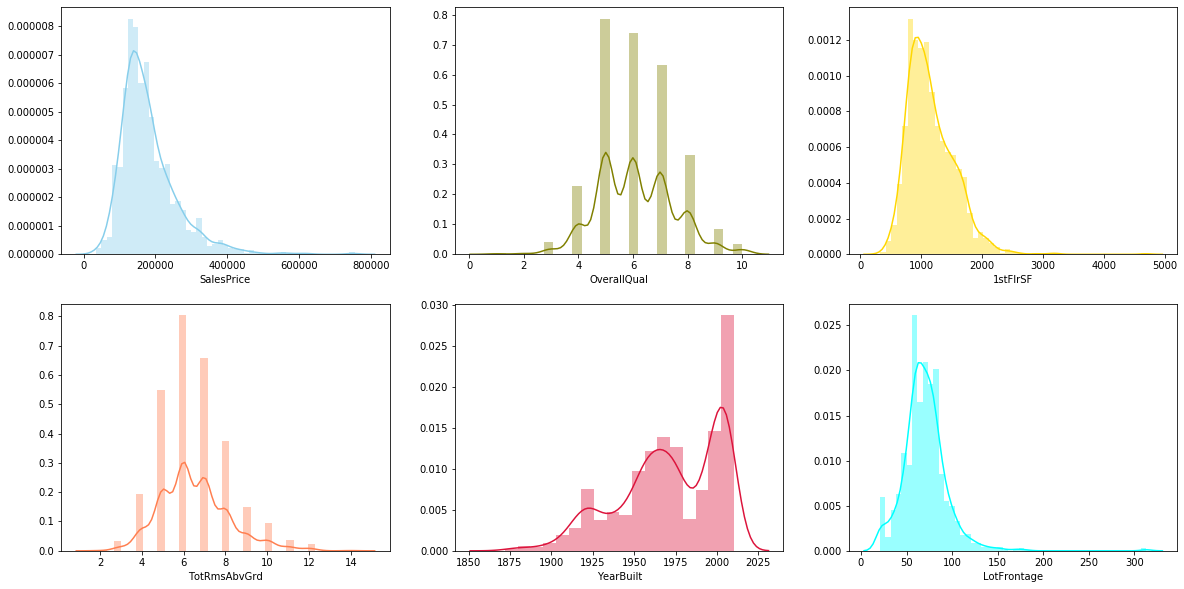

In [7]:
# library and data
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=False)
sns.distplot( House_Data[:,0] , color="skyblue", ax=axes[0, 0],axlabel="SalesPrice")
sns.distplot( House_Data[:,1] , color="olive", ax=axes[0, 1],axlabel="OverallQual")
sns.distplot( House_Data[:,2] , color="gold", ax=axes[0, 2],axlabel="1stFlrSF")
sns.distplot( House_Data[:,3] , color="coral", ax=axes[1, 0],axlabel="TotRmsAbvGrd")
sns.distplot( House_Data[:,4] , color="crimson", ax=axes[1, 1],axlabel="YearBuilt")
sns.distplot( House_Data[:,5] , color="cyan", ax=axes[1, 2],axlabel="LotFrontage")

#### Análisis de Correlación entre variables

##### Calculo de Coeficiente de Correlacion

Se cálcula el coeficiente de correlación entre cada variable x y y (SalesPrice)

In [14]:
##Efectuamos scatterplot de la Variable OverallQual vrs SalesPrice
OverallQual_coef = np.corrcoef(x=House_Data[:,1], y=House_Data[:,0])
print('Coeficiente Correlación OverallQual vrs SalesPrice:',OverallQual_coef[0,1])
print('=========================================================================')
##Efectuamos scatterplot de la Variable  1stFlrSF vrs SalesPrice
stFlrSF_coef = np.corrcoef(x=House_Data[:,2], y=House_Data[:,0])
print('Coeficiente Correlación 1stFlrSF vrs SalesPrice:',stFlrSF_coef[0,1])
print('=========================================================================')
##Efectuamos scatterplot de la Variable  TotRmsAbvGrd vrs SalesPrice
TotRmsAbvGrd_coef = np.corrcoef(x=House_Data[:,3], y=House_Data[:,0])
print('Coeficiente Correlación TotRmsAbvGrd vrs SalesPrice:',TotRmsAbvGrd_coef[0,1])
print('=========================================================================')
##Efectuamos scatterplot de la Variable  YearBuilt vrs SalesPrice
YearBuilt_coef = np.corrcoef(x=House_Data[:,4], y=House_Data[:,0])
print('Coeficiente Correlación YearBuilt vrs SalesPrice:',YearBuilt_coef[0,1])
print('=========================================================================')
##Efectuamos scatterplot de la Variable  LotFrontage vrs SalesPrice
##Dado que contiene datos Nan -> Tendremos que quitar del arreglos esos datos
datax = House_Data[np.logical_not(np.isnan(House_Data[:,5])),5]
datay= House_Data[np.logical_not(np.isnan(House_Data[:,5])),0]
LotFrontage_coef = np.corrcoef(x=datax, y=datay)
print('Coeficiente Correlación LotFrontage vrs SalesPrice:',LotFrontage_coef[0,1])
print('=========================================================================')

Coeficiente Correlación OverallQual vrs SalesPrice: 0.7909816005838047
Coeficiente Correlación 1stFlrSF vrs SalesPrice: 0.6058521846919148
Coeficiente Correlación TotRmsAbvGrd vrs SalesPrice: 0.5337231555820284
Coeficiente Correlación YearBuilt vrs SalesPrice: 0.5228973328794969
Coeficiente Correlación LotFrontage vrs SalesPrice: 0.35179909657067804


##### Graficas de Dispersión

Se colocan las graficas de dispersion(scatterplot) de cada variable contra SalesPrice.

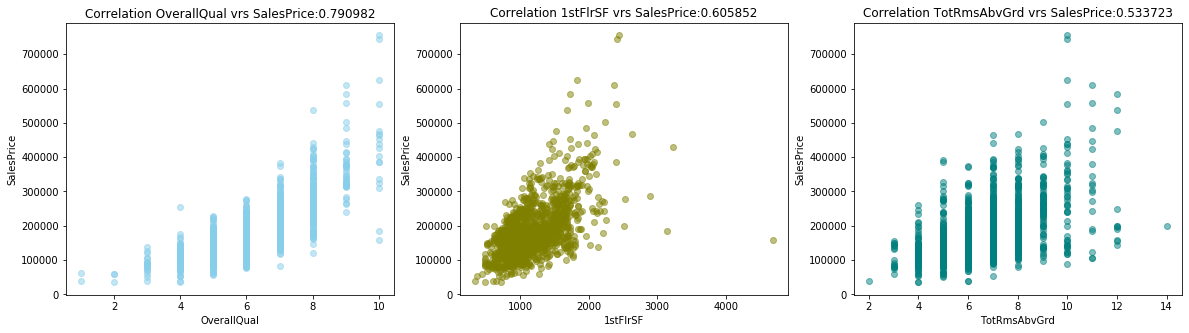

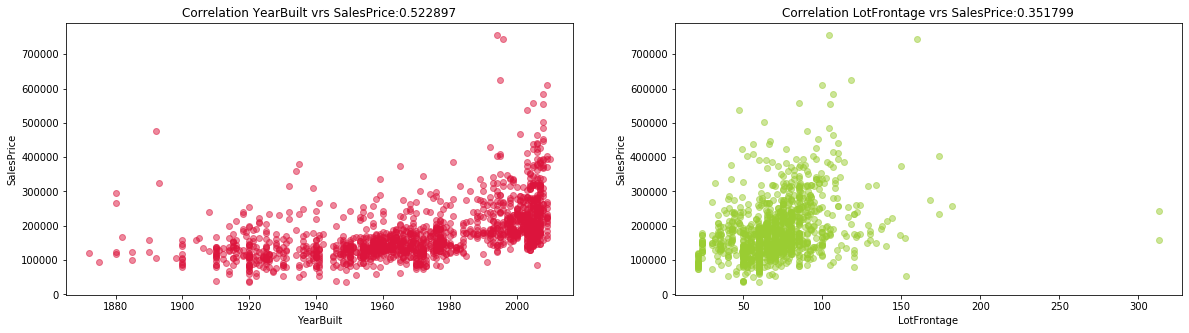

In [26]:
##Colocamos las graficas de dispersión
# plot
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=False)
##Efectuamos scatterplot de la Variable OverallQual vrs SalesPrice
axes[0].scatter( House_Data[:,1],House_Data[:,0] , c="skyblue", alpha=0.5)
axes[0].set_title('Correlation OverallQual vrs SalesPrice:'+str(round(OverallQual_coef[0,1],6)))
axes[0].set_xlabel('OverallQual')
axes[0].set_ylabel('SalesPrice')

##Efectuamos scatterplot de la Variable  1stFlrSF vrs SalesPrice
axes[1].scatter( House_Data[:,2],House_Data[:,0] , c="olive", alpha=0.5)
axes[1].set_title('Correlation 1stFlrSF vrs SalesPrice:'+str(round(stFlrSF_coef[0,1],6)))
axes[1].set_xlabel('1stFlrSF')
axes[1].set_ylabel('SalesPrice')

##Efectuamos scatterplot de la Variable  TotRmsAbvGrd vrs SalesPrice
axes[2].scatter( House_Data[:,3],House_Data[:,0] , c="teal", alpha=0.5)
axes[2].set_title('Correlation TotRmsAbvGrd vrs SalesPrice:'+str(round(TotRmsAbvGrd_coef[0,1],6)))
axes[2].set_xlabel('TotRmsAbvGrd')
axes[2].set_ylabel('SalesPrice')

##Efectuamos scatterplot de la Variable  YearBuilt vrs SalesPrice
f, axes2 = plt.subplots(1, 2, figsize=(20, 5), sharex=False)
axes2[0].scatter( House_Data[:,4],House_Data[:,0] , c="crimson", alpha=0.5)
axes2[0].set_title('Correlation YearBuilt vrs SalesPrice:'+str(round(YearBuilt_coef[0,1],6)))
axes2[0].set_xlabel('YearBuilt')
axes2[0].set_ylabel('SalesPrice')

##Efectuamos scatterplot de la Variable  LotFrontage vrs SalesPrice
axes2[1].scatter( House_Data[:,5],House_Data[:,0] , c="yellowgreen", alpha=0.5)
axes2[1].set_title('Correlation LotFrontage vrs SalesPrice:'+str(round(LotFrontage_coef[0,1],6)))
axes2[1].set_xlabel('LotFrontage')
axes2[1].set_ylabel('SalesPrice')


plt.show()

##### Elección de Variables para Modelar

Se elegirán las dos variables que tengan el mayor grado de correlación; en este caso:
* OverallQual
* 1stFlrSF

#### Modelo de Entrenamiento

Creamos la función para el entrenamiento para encontrar una función que aproxime la relación entre la variable independientes x a una variable dependiente y.

Se Crea una función para entrenar un modelo de regresión lineal de una variable **y = mx +b**.


In [117]:
def entrenar(x,y,epochs,imprimir_error_cada,lr):
    #x ->vector Numpy con  la variable independiente “x” ,  
    #y -> vector Numpy con la variable dependiente “y”,  
    #epochs -> indica por cuantas iteraciones entrenar el modelo.
    #imprimir_error_cada -> indica cada cuantas iteraciones queremos imprimir a través de print 
    #lr(learning rate) -> (escalar) es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo

    ##Creación de Matriz para almacenar los resultados
    results = np.ones((x.shape[0],2),dtype=float) #Primero la llenamos de uno
    #Copiamos en la primera columna todos los valores de la Variable independiente
    results[:,0] = x
    
    ##Parametros iniciales del Modelo para la funcion y = mx +b
    parametros_mb=[0.2,0.1]
    
    ##Almacenaremos el Error de cada iteración
    errors = np.empty(epochs,dtype=float)
    
    ##En esta estructura almacenaremos el modelo por cada iteración
    modelo_Iteracion = dict()
    
    for iteration in range(1,epochs+1):
        
        yhat = np.dot(results,parametros_mb)
        
        ##Calculas el error en el modelo
        error = 1/2*(np.average((y-yhat)**2))
        ##Almacenamos los datos del modelo
        modelo_Iteracion[iteration] = parametros_mb
        ##Lo almacenamos en el vector
        errors[iteration-1]=error
        
        ##Calculo del Gradiente de m y b
        gradiente_mb=[np.average(results[:,0]*(yhat-y)),np.average(results[:,1]*(yhat-y))]
        
        ##Actualizamos los datos de m y b de acuero a la gradiente
        parametros_mb= [parametros_mb[0]-(lr*gradiente_mb[0]),parametros_mb[1]-(lr*gradiente_mb[1])]
        
        
        if iteration % imprimir_error_cada == 0:
            print('Número de Iteración:',iteration,' Error en Iteración:',error)

    return modelo_Iteracion,errors
    

Se Crea una función que nos permita visualizar cómo cambia el error en el tiempo

In [132]:
def graficar_Error(errores):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
    
    x = np.arange(errores.shape[0])
    ax.plot(x, errores ,color="g",linewidth=4) 

    ax.set_xlabel('Iteración')
    ax.set_ylabel('Error')
    ax.set_title('Grafica de Error por Iteracion')

    plt.show()

In [242]:
def graficar_modelosEntrenamiento(x_entrenamiento,y_entrenamiento,resultadoEntrenamiento,n,x_label,y_label):
    
    #Buscamos el numero de entrenamiento
    epochs = len(resultadoEntrenamiento)
    
    ##Creamos una estructura que nos permitirá guardar los resultados del modelo
    Modelresults = np.ones((x_entrenamiento.shape[0],2),dtype=float) #Primero la llenamos de uno
    #Copiamos en la primera columna todos los valores de la Variable independiente
    Modelresults[:,0] = x_entrenamiento
    #Armamos el resultado de nuestro modelo
    Modelresults[:,1] = np.dot(Modelresults,resultadoEntrenamiento[1])
    
    ## Seteamos algunos datos que nos serviran para colocar las graficas agrupada
    Tot = epochs//n ##Total de Graficas
    Cols = 3 ##En cuantas columnas agruparemos las graficas
    # Cuantas Filas necesitamos para la grafica
    Rows = Tot // Cols 
    Rows += Tot % Cols
    
    # Indice para la posición de la grafica
    Position = 1 ##Inicia en la primera posición
    
    #Seteamos los datos iniciales figura
    fig = plt.figure()
    fig.set_figheight(18)
    fig.set_figwidth(20)
    
    #Recorremos los modelos que vamos a graficar
    for iteracion in range(n,epochs+1,n):
        ##Calculamos los datos del modelo y=mx + b 
        ##Creamos una estructura que nos permitirá guardar los resultados del modelo
        Modelresults = np.ones((x_entrenamiento.shape[0],2),dtype=float) #Primero la llenamos de uno
        #Copiamos en la primera columna todos los valores de la Variable independiente
        Modelresults[:,0] = x_entrenamiento
        #Armamos el resultado de nuestro modelo
        Modelresults[:,1] = np.dot(Modelresults,resultadoEntrenamiento[iteracion])
        
        #fig = plt.figure()
        ax = fig.add_subplot(Rows,Cols,Position)
        ax.plot( Modelresults[:,0],Modelresults[:,1], color="g", alpha=0.5)
        ax.scatter( x_entrenamiento,y_entrenamiento , c="red", alpha=0.5)
        ax.set_title('Modelo de Entrenamiento:'+str(iteracion)+ ' m:'+str(round(resultadoEntrenamiento[iteracion][0],2))+' b:'+str(round(resultadoEntrenamiento[iteracion][1],2)))
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        
        Position+=1 

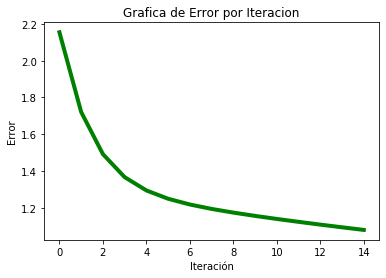

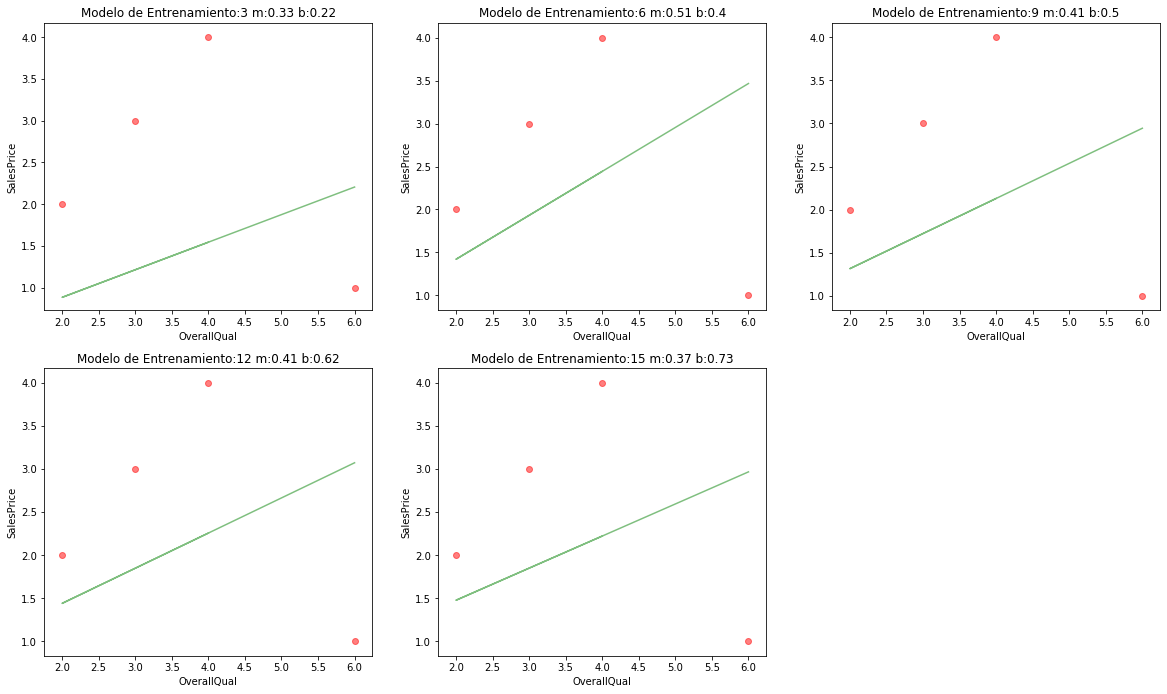

In [243]:
res,errores = entrenar(np.array([6,2,3,4]),np.array([1,2,3,4]),15,20,0.1)
graficar_Error(errores)
graficar_modelosEntrenamiento(np.array([6,2,3,4]),np.array([1,2,3,4]),res,3,"OverallQual","SalesPrice")